In [1]:
import yaml
yaml.warnings({'YAMLLoadWarning': False})
import os

with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

In [2]:
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']

# load library

In [3]:
# python default library
import os
import shutil
import datetime
import sys
import pickle

# general analysis tool-kit
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# original library
sys.path.append('/home/hiroki/research/dcase2021_task2/src/functions')
import common as com
import pytorch_modeler as modeler

# etc
import yaml
yaml.warnings({'YAMLLoadWarning': False})

import librosa
import IPython
import librosa.display

# load config and set logger

In [4]:
log_folder = config['IO_OPTION']['OUTPUT_ROOT']+'/{0}.log'.format(datetime.date.today())
logger = com.setup_logger(log_folder, '00_train.py')

# Setting

In [5]:
# Setting seed
modeler.set_seed(42)

In [6]:
############################################################################
# Setting I/O path
############################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_dir = INPUT_ROOT + "/dev_data"
add_dev_dir = INPUT_ROOT + "/add_dev_data"
# machine type
machine_types = os.listdir(dev_dir)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
TB_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/tb'
OUT_FEATURE_DIR = OUTPUT_ROOT + '/extraction_features'
#os.makedirs(OUTPUT_ROOT, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(TB_DIR, exist_ok=True)
os.makedirs(OUT_FEATURE_DIR, exist_ok=True)
# copy config
shutil.copy('./config.yaml', OUTPUT_ROOT)

'/media/hiroki/HDD1TB/research/dcase2021_task2/output/MahalanobisAD/config.yaml'

# load data

In [30]:
machine_types

['fan', 'gearbox', 'pump', 'slider', 'ToyCar', 'ToyTrain', 'valve']

In [7]:
machine_type = 'pump'
input_path = f'{OUT_FEATURE_DIR}/{machine_type}_features.pkl'
ext_data = pd.read_pickle(input_path)

In [35]:
data_types = ['train', 'valid_source', 'valid_target']

In [38]:
for i, data_type in enumerate(data_types):
    if i == 0:
        feat = ext_data[data_type]['features']
    else:
        feat = np.concatenate([feat, ext_data[data_type]['features']], axis=0)

In [39]:
feat.shape

(4209, 3072)

# Describe

In [29]:
pd.set_option('display.max_columns', 5000)
feat_df.describe()

0           1           2           3           4           5     \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     0.149735    0.007017    0.001523    0.012481    0.048403    0.222141   
std      0.020998    0.001774    0.000952    0.001625    0.008117    0.023686   
min      0.120589    0.003625    0.000023    0.006940    0.030551    0.174467   
25%      0.132545    0.005624    0.000799    0.011235    0.042196    0.206570   
50%      0.140703    0.006601    0.001450    0.012345    0.045479    0.215731   
75%      0.166597    0.008460    0.002105    0.013841    0.056168    0.237557   
max      0.206406    0.015066    0.008117    0.016953    0.069187    0.298824   

             6             7           8           9           10    \
count  600.000000  6.000000e+02  600.000000  600.000000  600.000000   
mean     1.499881  3.067074e-08    2.438874    6.398503    5.845790   
std      0.153347  3.706645e-07    0.252388    0.672903    0.606443   
min      1.163038  0.000000e+00    1.878461    4.911745    4.505274   
25%      1.360496  0.000000e+00    2.202475    5.769584    5.278599   
50%      1.537687  0.000000e+00    2.495232    6.560521    5.985602   
75%      1.601059  0.000000e+00    2.608812    6.853047    6.254359   
max      2.042471  5.991011e-06    3.333543    8.783026    7.992591   

             11          12          13          14            15    \
count  600.000000  600.000000  600.000000  600.000000  6.000000e+02   
mean     0.000166    0.014109    1.938406    0.004751  1.063706e-06   
std      0.000090    0.013325    0.195044    0.001433  1.367702e-06   
min      0.000083    0.001908    1.496280    0.002561  0.000000e+00   
25%      0.000126    0.004102    1.764946    0.003930  0.000000e+00   
50%      0.000144    0.006287    1.986308    0.004554  4.136202e-07   
75%      0.000177    0.026524    2.068090    0.005028  1.908480e-06   
max      0.001005    0.050567    2.631241    0.014266  9.426889e-06   

             16          17          18          19          20          21    \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     3.292559    0.106013    1.508673    0.000465    0.916410    0.029202   
std      0.341183    0.027902    0.153561    0.000221    0.091863    0.006187   
min      2.541339    0.069334    1.171429    0.000029    0.709081    0.018697   
25%      2.973042    0.082838    1.364124    0.000317    0.832440    0.024091   
50%      3.372211    0.094846    1.547636    0.000429    0.939033    0.027600   
75%      3.521312    0.131162    1.609005    0.000581    0.977871    0.033457   
max      4.498965    0.184617    2.052906    0.001697    1.241290    0.054545   

             22          23          24          25          26          27    \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     1.034880    0.116556    0.002058    0.002658    2.170439    0.129317   
std      0.105026    0.017026    0.001437    0.000468    0.222159    0.022765   
min      0.804385    0.092946    0.000120    0.001769    1.671311    0.093654   
25%      0.936791    0.102609    0.001196    0.002315    1.968646    0.113514   
50%      1.059945    0.109455    0.001651    0.002469    2.223792    0.120234   
75%      1.104627    0.131069    0.002304    0.002945    2.318631    0.145102   
max      1.407236    0.168251    0.009156    0.004384    2.957972    0.199888   

             28          29          30          31          32          33    \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean     2.620452    4.126457    0.015031    0.014227    0.138866    2.535557   
std      0.275318    0.432903    0.003633    0.004066    0.018278    0.261007   
min      2.013999    3.174154    0.008597    0.004818    0.085556    1.964512   
25%      2.363544    3.724510    0.012212    0.011394    0.125719    2.293137   
50%      2.684853    4.229275    0.013940    0.013743    

In [45]:
pd.set_option('display.max_columns', 50)

In [82]:
corrmat = pd.DataFrame(np.corrcoef(feat.T))

/home/hiroki/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/hiroki/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<ipython-input-86-e9ff5c3bdb10>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad("k",1.)


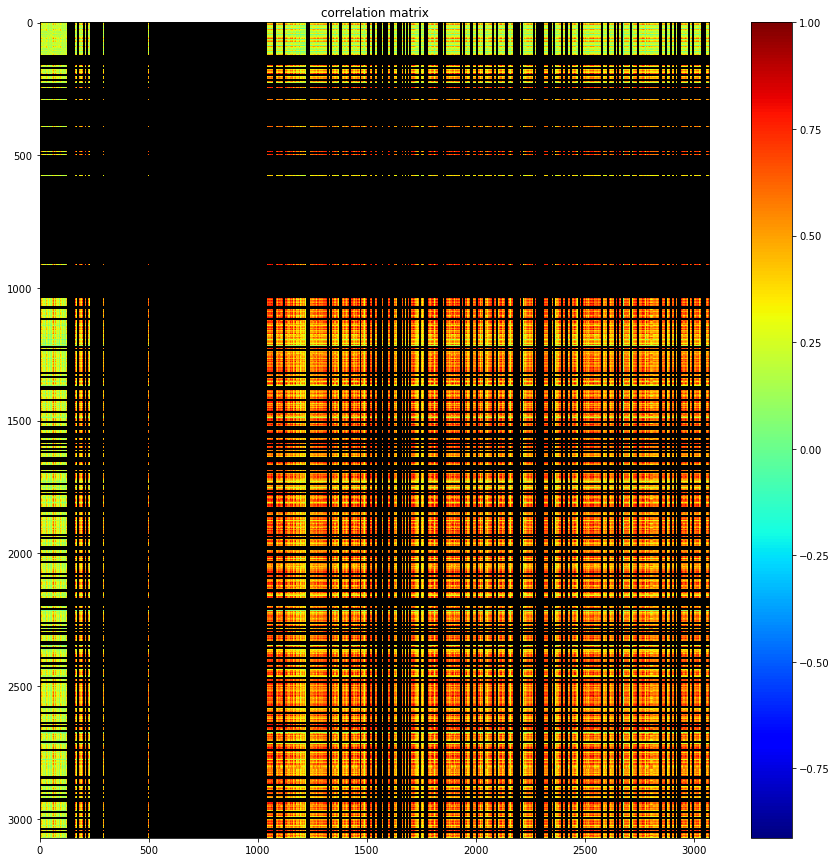

In [86]:
plt.figure(figsize=(15,15))
cmap = plt.cm.jet
cmap.set_bad("k",1.)
plt.imshow(corrmat, aspect='auto', cmap=cmap)
plt.title('correlation matrix')
plt.colorbar()

# umap

In [31]:
feat

array([[0.13485193, 0.00570295, 0.00098304, ..., 0.00496192, 0.00198496,
        0.00201762],
       [0.16767621, 0.00892119, 0.00024075, ..., 0.00327215, 0.00450789,
        0.00246151],
       [0.13678068, 0.00570439, 0.00124973, ..., 0.01840424, 0.00025599,
        0.00260276],
       ...,
       [0.13539356, 0.00617818, 0.00225784, ..., 0.02023651, 0.00029418,
        0.00278978],
       [0.19175963, 0.00802346, 0.00062624, ..., 0.0119138 , 0.00137638,
        0.00262907],
       [0.13310857, 0.00471354, 0.00360373, ..., 0.01465523, 0.00034446,
        0.00278658]], dtype=float32)